In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(<matplotlib.axes._subplots.AxesSubplot at 0x246b054bef0>,
 Text(0.5, 1.0, 'python'))

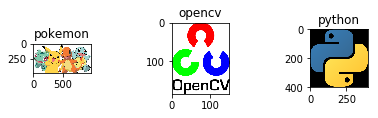

In [4]:
pokemon = cv2.imread('./pokemon.jpg')
opencv = cv2.imread('./opencv.png')
python = cv2.imread('./python.png')

plt.subplot(1,5,1), plt.imshow( cv2.cvtColor(pokemon,cv2.COLOR_BGR2RGB) ), plt.title("pokemon")
plt.subplot(1,5,3), plt.imshow( cv2.cvtColor(opencv,cv2.COLOR_BGR2RGB) ), plt.title("opencv")
plt.subplot(1,5,5), plt.imshow( cv2.cvtColor(python,cv2.COLOR_BGR2RGB) ), plt.title("python")

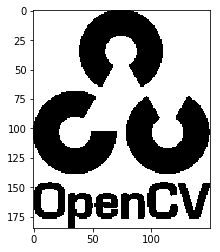

In [15]:
black_screen = np.zeros_like(opencv)
condition = (opencv[:,:, 0] == 255) & (opencv[..., 1] == 255) & (opencv[..., 2] == 255) #3Chanels Check
black_screen[condition] = (255, 255, 255)
plt.imshow(cv2.cvtColor(black_screen, cv2.COLOR_BGR2RGB))

In [16]:
black_screen.shape

(185, 150, 3)

In [19]:
mask = (black_screen == (0,0,0))

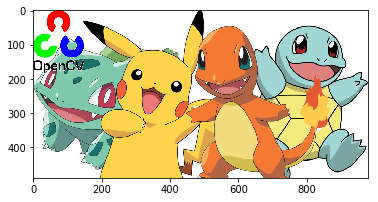

In [20]:
pokemon[:185,:150][mask] = opencv[mask]
plt.imshow(cv2.cvtColor(pokemon, cv2.COLOR_BGR2RGB))

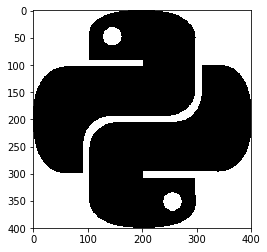

In [23]:
black_screen2 = np.zeros_like(python)
condition2 = (python[..., 0] == 0) & (python[..., 1] == 0) & (python[..., 2] == 0)
black_screen2[condition2] = (255, 255, 255)
plt.imshow(cv2.cvtColor(black_screen2, cv2.COLOR_BGR2RGB))

In [24]:
mask2 = (black_screen2 == (0,0,0)) 

In [25]:
h_big, w_big, _ = pokemon.shape
h_small, w_small, _ = python.shape
start_h =  int(0.5*(h_big-h_small))
end_h = int(0.5*(h_big+h_small))
start_w = int(0.5*(w_big-w_small))
end_w  = int(0.5*(w_big+w_small))

In [26]:
a = cv2.bitwise_or(pokemon[start_h:end_h, start_w:end_w], black_screen2)
b = cv2.bitwise_or(python, black_screen2)
c = cv2.addWeighted(a,0.7,b,0.3,0)

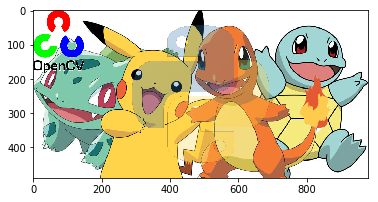

In [27]:
pokemon[start_h:end_h, start_w:end_w][mask2]  = c[mask2]
plt.imshow(cv2.cvtColor(pokemon , cv2.COLOR_BGR2RGB))